<h1 style="text-align: center;"> Final Project </h1>
<p style="text-align: center;"> <strong> Yichen Gong, Yihan Xu, Frank Zhao</strong></p>

## I. Dataset
### (a). Dataset Introduction
We are using the [Home Mortgage Disclosure Act (HMDA)](https://www.consumerfinance.gov/data-research/hmda/) dataset of the Consumer Financial Protection Bureau (CFPB) to study upon which conditions a mortgage request is approved or rejected. Our research focuses on the dataset between 2018 and 2019, which can be downloaded from [FFEIC](https://ffiec.cfpb.gov/data-publication/).

### (b). Dataset Summary Statistics and Preprocessing
#### (1). load data from disk

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
pd.options.display.max_rows = 70
df = pd.read_csv("lar_10.csv", delimiter = ",", dtype = {"activity_year": "object", "action_taken":"object", "preapproval":"object", "loan_type":"object", "loan_purpose":"object","hoepa_status  ":"object","activity_year":"object"} )

c:\users\27161\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


#### (2). Summary data statistics and pick features/observations of interest

In [2]:
df.describe()

,Unnamed: 0,derived_msa_md,purchaser_type,lien_status,reverse_mortgage,open_end_line_of_credit,business_or_commercial_purpose,loan_amount,hoepa_status,negative_amortization,...,denial_reason_2,denial_reason_3,denial_reason_4,tract_population,tract_minority_population_percen,ffiec_msa_md_median_family_incom,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_unit
count,1.689568e+06,1.689568e+06,1.689568e+06,1.689568e+06,1.689568e+06,1.689568e+06,1.689568e+06,1.689568e+06,1.689568e+06,1.689568e+06,...,67868.000000,12077.000000,1211.000000,1.689568e+06,1.689568e+06,1.689568e+06,1.689568e+06,1.689568e+06,1.689568e+06,1.689568e+06
mean,8.447835e+05,3.683390e+04,5.257184e+00,1.143089e+00,3.173110e+01,3.119922e+01,3.147323e+01,2.413841e+05,2.431189e+00,3.206510e+01,...,4.116137,4.721620,4.596201,5.549739e+03,3.129275e+01,7.365712e+04,1.107751e+02,1.427816e+03,1.949313e+03,3.488797e+01
std,4.877364e+05,2.426175e+04,1.644296e+01,3.511507e-01,1.791502e+02,1.780380e+02,1.784724e+02,9.011438e+05,4.976853e-01,1.801097e+02,...,2.668994,2.773378,3.491376,3.233306e+03,2.616027e+01,1.945617e+04,4.482474e+01,9.023557e+02,1.129251e+03,1.841395e+01
min,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,5.000000e+03,-1.000000e+00,-1.000000e+00,...,-1.000000,-1.000000,-1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00
25%,4.223918e+05,1.974000e+04,0.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,9.500000e+04,2.000000e+00,2.000000e+00,...,2.000000,3.000000,1.000000,3.729000e+03,1.051000e+01,6.420000e+04,8.500000e+01,8.930000e+02,1.297000e+03,2.100000e+01
50%,8.447835e+05,3.387400e+04,0.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.750000e+05,2.000000e+00,2.000000e+00,...,3.000000,4.000000,5.000000,5.078000e+03,2.315000e+01,7.380000e+04,1.070000e+02,1.303000e+03,1.790000e+03,3.300000e+01
75%,1.267175e+06,4.174000e+04,2.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.850000e+05,3.000000e+00,2.000000e+00,...,6.000000,7.000000,7.000000,6.707000e+03,4.600000e+01,8.180000e+04,1.330000e+02,1.795000e+03,2.397000e+03,4.700000e+01
max,1.689567e+06,9.999900e+04,7.200000e+01,2.000000e+00,1.111000e+03,1.111000e+03,1.111000e+03,3.100050e+08,3.000000e+00,1.111000e+03,...,9.000000,9.000000,9.000000,5.381200e+04,1.000000e+02,1.510000e+05,5.070000e+02,1.952900e+04,2.539100e+04,7.600000e+01


In [3]:
df_Selected = df[["activity_year","derived_ethnicity", "derived_race", "derived_sex", "action_taken",
                            "preapproval","loan_type", "loan_purpose", "lien_status", "reverse_mortgage",
                            "open_end_line_of_credit", "business_or_commercial_purpose", "combined_loan_to_value_ratio",
                            "property_value", "construction_method", "occupancy_type", "total_units",
                            "income", "debt_to_income_ratio", "applicant_age", "submission_of_application"
                            ]]
df_Selected = df_Selected[df_Selected["action_taken"].isin(("1", "3"))]
df_Selected = df_Selected[df_Selected["derived_ethnicity"] != "Free Form Text Only"]
df_Selected = df_Selected[df_Selected["derived_race"] != "Free Form Text Only"]
df_Selected = df_Selected[df_Selected["derived_sex"] != "Sex Not Available"]
# 5 means Loan Purpose not applicable
df_Selected = df_Selected[df_Selected["loan_purpose"] != "5"]
# 1111 means the feature is not applicable
df_Selected = df_Selected[df_Selected["reverse_mortgage"] != 1111]
df_Selected = df_Selected[df_Selected["open_end_line_of_credit"] != 1111]
df_Selected = df_Selected[df_Selected["business_or_commercial_purpose"] != 1111]
df_Selected = df_Selected[df_Selected["submission_of_application"] != 1111]
df_Selected = df_Selected[df_Selected["property_value"] != "Exempt"]
df_Selected = df_Selected[df_Selected["construction_method"] != "Free Form Text Only"]
df_Selected = df_Selected[df_Selected["income"] != "Free Form Text Only"]
df_Selected = df_Selected[df_Selected["income"] != "Exempt"]
df_Selected = df_Selected[df_Selected["debt_to_income_ratio"] != "Exempt"]
# 8888, 9999 means age is not applicable
df_Selected = df_Selected[df_Selected["applicant_age"] != '8888']
df_Selected = df_Selected[df_Selected["applicant_age"] != '9999']
df_Selected =df_Selected[df_Selected["combined_loan_to_value_ratio"] != "Exempt"]
df_Selected["lien_status"] = df_Selected["lien_status"].astype(object)
df_Selected["reverse_mortgage"] = df_Selected["reverse_mortgage"].astype(object)
df_Selected["open_end_line_of_credit"] = df_Selected["open_end_line_of_credit"].astype(object)
df_Selected["business_or_commercial_purpose"] = df_Selected["business_or_commercial_purpose"].astype(object)
df_Selected["submission_of_application"] = df_Selected["submission_of_application"].astype(object)
df_Selected["occupancy_type"] = df_Selected["occupancy_type"].astype(object)
df_Selected["construction_method"] = df_Selected["construction_method"].astype(object)
df_Selected["combined_loan_to_value_ratio"] = df_Selected["combined_loan_to_value_ratio"].astype(float)
df_Selected["property_value"] = df_Selected["property_value"].astype(float)
df_Selected = pd.get_dummies(df_Selected)
df_2019_Selected = df_Selected[df_Selected["activity_year_2019"] == 1]
df_2018_Selected = df_Selected[df_Selected["activity_year_2018"] == 1]
df_2019_Selected = df_2019_Selected.drop(columns = ["activity_year_2019", "activity_year_2018"])
df_2018_Selected = df_2018_Selected.drop(columns = ["activity_year_2019", "activity_year_2018"])

In [4]:
df_2019_Selected

,combined_loan_to_value_ratio,property_value,income,derived_ethnicity_Ethnicity Not Available,derived_ethnicity_Hispanic or Latino,derived_ethnicity_Joint,derived_ethnicity_Not Hispanic or Latino,derived_race_2 or more minority races,derived_race_American Indian or Alaska Native,derived_race_Asian,...,debt_to_income_ratio_>60%,applicant_age_25-34,applicant_age_35-44,applicant_age_45-54,applicant_age_55-64,applicant_age_65-74,applicant_age_<25,applicant_age_>74,submission_of_application_1,submission_of_application_2
1513977,44.666,365000.0,94.0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1513980,97.177,145000.0,40.0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1513981,103.860,375000.0,190.0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1513986,71.429,245000.0,173.0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1513990,98.886,145000.0,50.0,0,0,0,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1689560,94.258,205000.0,179.0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1689561,75.510,435000.0,90.0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
1689563,89.580,265000.0,95.0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1689566,90.404,395000.0,0.0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [5]:
# fill numeric values with mean and drop null values of dummies
df_2019_Selected = df_2019_Selected.dropna()
df_2019_Selected = pd.get_dummies(df_2019_Selected)

In [6]:
df_2018_Selected = df_2018_Selected.fillna(df_2018_Selected.mean(numeric_only=True))
df_2018_Selected = df_2018_Selected.dropna()
df_2018_Selected = pd.get_dummies(df_2018_Selected)

In [7]:
# Our dataset should not have null values now.
print(df_2019_Selected.isnull().sum())
print(df_2018_Selected.isnull().sum())

combined_loan_to_value_ratio                 0
property_value                               0
income                                       0
derived_ethnicity_Ethnicity Not Available    0
derived_ethnicity_Hispanic or Latino         0
                                            ..
applicant_age_65-74                          0
applicant_age_<25                            0
applicant_age_>74                            0
submission_of_application_1                  0
submission_of_application_2                  0
Length: 82, dtype: int64
combined_loan_to_value_ratio                 0
property_value                               0
income                                       0
derived_ethnicity_Ethnicity Not Available    0
derived_ethnicity_Hispanic or Latino         0
                                            ..
applicant_age_65-74                          0
applicant_age_<25                            0
applicant_age_>74                            0
submission_of_application_1        

In [8]:
print(f"We currently have {df_2018_Selected.shape[0]} observations for 2018.")
print(f"We currently have {df_2019_Selected.shape[0]} observations for 2019.")

We currently have 909967 observations for 2018.
We currently have 94726 observations for 2019.


In [26]:
df_2018_Selected.corr()["action_taken_1"].sort_values().to_csv('2018_corr.csv')

In [25]:
df_2019_Selected.corr()["action_taken_1"].sort_values().to_csv('2019_corr.csv')

## II. Training and Explaining
### (a). Split the dataset and normalize input

In [9]:
from sklearn.model_selection import train_test_split as tr_te_split
y_train = df_2018_Selected["action_taken_1"]
X_train = df_2018_Selected.drop(columns = ["action_taken_1", 'action_taken_3'] )
y_test = df_2019_Selected["action_taken_1"]
X_test = df_2019_Selected.drop(columns = ["action_taken_1", 'action_taken_3'] )
ph1, X_test, ph2, y_test = tr_te_split(X_test, y_test, test_size=0.3, random_state=0)
del ph1
del ph2
for col in X_train.columns:
    if X_train.dtypes[col] == "float":
        mean = X_train.mean()[col]
        std = X_train.std()[col]
        X_train[col] = (X_train[col] - mean) / std
        X_test[col] = (X_test[col] - mean) / std
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]
X_test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_test.columns.values]

In [10]:
print(f"We currently have {X_train.shape[0]} observations for the training set.")
print(f"We currently have {X_test.shape[0]} observations for the testing set.")
print(f"We currently have {X_train.shape[1]} features for the model.")

We currently have 909967 observations for the training set.
We currently have 28418 observations for the testing set.
We currently have 80 features for the model.


In [11]:
print(set(X_test.columns)-set(X_train.columns))
print(set(X_train.columns)-set(X_test.columns))

set()
set()


### (b).(1) Train a logistic regression model

The score of training set is: 0.9990197446720596
The score of testing set is: 0.8625870926877331


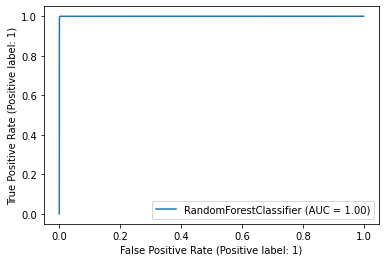

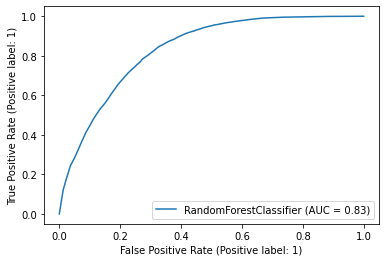

In [57]:
from sklearn.metrics import plot_roc_curve
rfc_original = RandomForestClassifier()
rfc_original.fit(X_train, y_train)
plot_roc_curve(rfc_original, X_train, y_train)
print("The score of training set is:", rfc_original.score(X_train, y_train))
plot_roc_curve(rfc_original, X_test, y_test)
print("The score of testing set is:", rfc_original.score(X_test, y_test))

### (b).(2) Explain a logistic regression model

In [ ]:
# Since we have a training set whose size is 909967*80, it will spend too much computing power when we are doing grid search.
# So we select 10% of the training set to do the grid search and use its learned hyperparameter.

In [34]:

x_train, x_val, Y_train, Y_val = tr_te_split(X_train, y_train, test_size=0.9, random_state=0)


The score of training set is: 0.9997582311310387
The score of testing set is: 0.8632556830178056


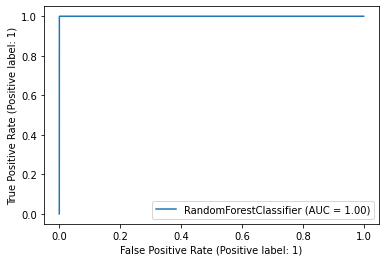

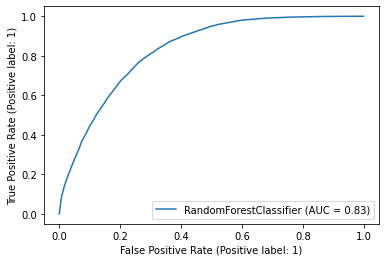

In [58]:
rfc_original.fit(x_train, Y_train)
plot_roc_curve(rfc_original, x_train, Y_train)
print("The score of training set is:", rfc_original.score(x_train, Y_train))
plot_roc_curve(rfc_original, X_test, y_test)
print("The score of testing set is:", rfc_original.score(X_test, y_test))

### (b).(3) Train a logistic regression model

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [51]:
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots()

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title("Grid Search Scores", fontsize=16)
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.legend(loc="best", fontsize=8)
    ax.grid('on')



In [28]:
param_grid = {'n_estimators':np.arange(10, 100, 10)}
param_grid = {'max_depth':np.arange(20, 50, 5)}
param_grid = {'max_leaf_nodes':np.arange(25,50,5)}


In [29]:
param_grid = {'criterion':['gini', 'entropy']}
param_grid = {'min_samples_split':np.arange(2, 2+10, 1)}
param_grid = {'min_samples_leaf':np.arange(1, 1+10, 1)}
param_grid = {'max_features':np.arange(5,30,1)}

In [ ]:
# We use sklearn.model_selection.GridSearchCV to do grid search.
# Since the limitation of computing power, we select 2 parameters every time.
# So we can get a relative accurate result in a short time

In [37]:
param_grid = {'n_estimators':np.arange(50, 150, 10),
             'max_depth':np.arange(20, 50, 5)}

rfc = RandomForestClassifier()
GS = GridSearchCV(rfc,param_grid)
GS.fit(x_train,Y_train)
print(GS.best_params_)
print(GS.best_score_)



{'max_depth': 20, 'n_estimators': 140}
0.8396852815847267


In [39]:
print(GS.cv_results_)



{'mean_fit_time': array([  5.35960898,   4.98752775,   5.66628089,   6.50706658,
         7.36826348,   8.13244085,   8.92246671,   9.71919122,
        10.51197228,  11.1637187 ,   4.64305115,   5.49770613,
         6.40964637,   7.33465323,   8.28390579,   9.23693118,
        10.1572927 ,  11.09530258,  12.0507236 ,  12.98818626,
         5.11195464,   6.106778  ,   7.13461976,   8.16829233,
         9.16226697,  10.19014859,  11.16561856,  12.2328629 ,
        13.21143813,  14.25387635,   5.31581879,   6.40409651,
         7.44568276,   8.47271075,   9.56095576,  10.57238617,
        11.63763056,  12.6454514 ,  13.79041762, 526.93701892,
         5.47443738,   6.53008018,   7.65017886,   8.66236   ,
         9.75910988,  10.87911224,  11.86968164,  12.96754727,
        14.05305381,  15.2219871 ,   5.47404408,   6.52727671,
         7.60191908,   8.69056187,   9.81501837,  10.86651225,
        11.96615605,  13.09216876,  14.13444324,  15.38627491]), 'std_fit_time': array([5.30865725e-

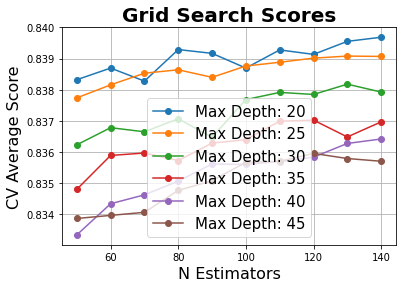

In [43]:
n_estimators = np.arange(50, 150, 10)
max_depth = np.arange(20, 50, 5)
plot_grid_search(GS.cv_results_, n_estimators, max_depth, 'N Estimators', 'Max Depth')

In [ ]:
# The previous result shows that "n_estimators" should greater than 150 and "max_depth" should smaller than 20.

In [45]:
param_grid = {'n_estimators':np.arange(150, 501, 50),
             'max_depth':np.arange(5, 21, 3)}

rfc = RandomForestClassifier()
GS = GridSearchCV(rfc,param_grid)
GS.fit(x_train,Y_train)
print(GS.best_params_)
print(GS.best_score_)

{'max_depth': 17, 'n_estimators': 200}
0.8390808539776063


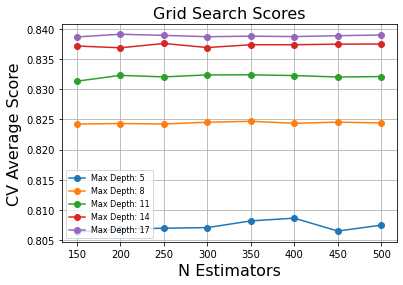

In [52]:
n_estimators = np.arange(150, 501, 50)
max_depth = np.arange(5, 21, 3)
plot_grid_search(GS.cv_results_, n_estimators, max_depth, 'N Estimators', 'Max Depth')

In [ ]:
# The previous result shows that "n_estimators" should be 200 and "max_depth" should be 20.

In [54]:
param_grid = {'max_leaf_nodes':np.arange(100,501,100),
             'criterion':['gini', 'entropy']}

rfc2 = RandomForestClassifier(n_estimators=200, max_depth=20)
GS2 = GridSearchCV(rfc2,param_grid)
GS2.fit(x_train,Y_train)
print(GS2.best_params_)
print(GS2.best_score_)


{'criterion': 'gini', 'max_leaf_nodes': 500}
0.8365752332726892


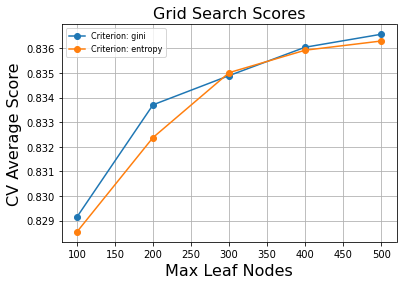

In [55]:
max_leaf_nodes = np.arange(100,501,100)
criterion = ['gini', 'entropy']
plot_grid_search(GS2.cv_results_, max_leaf_nodes, criterion, 'Max Leaf Nodes', 'Criterion')

In [60]:
# Since the score keeps increasing as max_leaf_nodes keeps increasing, we assume unlimited max_leaf_nodes will be a good choice.
param_grid = {'min_samples_split':np.arange(2, 20, 2),
             'max_features':["sqrt", "log2"]}
rfc3 = RandomForestClassifier(n_estimators=200, max_depth=20, criterion='gini')
rfc3 = RandomForestClassifier(n_estimators=200, max_depth=20, criterion='gini')
GS3 = GridSearchCV(rfc2,param_grid)
GS3.fit(x_train,Y_train)
print(GS3.best_params_)
print(GS3.best_score_)

{'max_features': 'sqrt', 'min_samples_split': 16}
0.8401468272921649


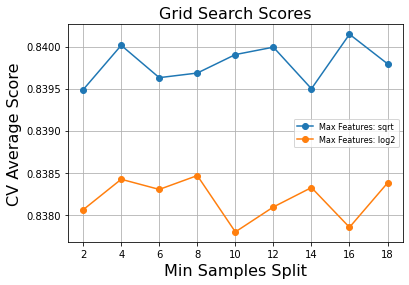

In [61]:
min_samples_split = np.arange(2, 20, 2)
max_features = ["sqrt", "log2"]
plot_grid_search(GS3.cv_results_, min_samples_split, max_features, 'Min Samples Split', 'Max Features')

The score of training set is: 0.8563673128489164
The score of testing set is: 0.8716658455908227


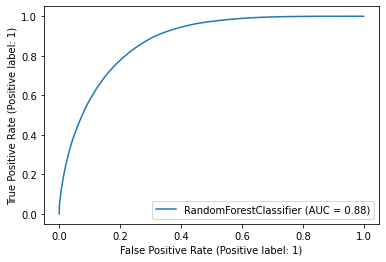

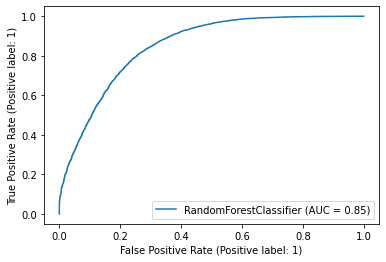

In [63]:
rfc4 = RandomForestClassifier(n_estimators=200, max_depth=20, criterion='gini', max_features = "sqrt", min_samples_split = 16 )
rfc4.fit(X_train, y_train)
plot_roc_curve(rfc4, X_train, y_train)
print("The score of training set is:", rfc4.score(x_train, Y_train))
plot_roc_curve(rfc4, X_test, y_test)
print("The score of testing set is:", rfc4.score(X_test, y_test))